In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from prophet import Prophet

In [2]:
dados = yf.download('PRIO3.SA', start = '2020-01-01', end = '2023-12-31', progress = False)
dados = dados.reset_index()
dados.columns = ['data', 'abertura', 'max', 'min', 'fechamento', 'fechamento_aju', 'volume']
dados

,data,abertura,max,min,fechamento,fechamento_aju,volume
0,2020-01-02,6.740000,7.176000,6.658000,7.156000,7.144525,9317500
1,2020-01-03,7.400000,7.720000,7.180000,7.570000,7.557861,17031000
2,2020-01-06,7.730000,7.950000,7.454000,7.718000,7.705623,25412000
3,2020-01-07,7.760000,7.866000,7.550000,7.728000,7.715608,11539500
4,2020-01-08,7.740000,7.830000,7.570000,7.570000,7.557861,9843500
...,...,...,...,...,...,...,...
988,2023-12-21,45.750000,45.799999,44.840000,45.160000,45.160000,8095500
989,2023-12-22,45.340000,45.740002,45.110001,45.369999,45.369999,6295400
990,2023-12-26,45.689999,46.380001,45.540001,45.919998,45.919998,7602300
991,2023-12-27,45.919998,46.700001,45.680000,45.939999,45.939999,6627600


In [3]:
dados_treino = dados[dados['data'] < '2023-07-31']
dados_teste = dados[dados['data'] >= '2023-07-31']

In [4]:
dados_treino_prophet = dados_treino[['data', 'fechamento']].rename(columns={'data':'ds','fechamento':'y'})
dados_treino_prophet

,ds,y
0,2020-01-02,7.156000
1,2020-01-03,7.570000
2,2020-01-06,7.718000
3,2020-01-07,7.728000
4,2020-01-08,7.570000
...,...,...
884,2023-07-24,46.169998
885,2023-07-25,44.959999
886,2023-07-26,45.590000
887,2023-07-27,45.090000


In [5]:
modelo = Prophet(weekly_seasonality=True,
        yearly_seasonality=True,
        daily_seasonality=False)

modelo.add_country_holidays(country_name='BR')

modelo.fit(dados_treino_prophet)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_gymudmb/qtfr0izd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_gymudmb/zs1g9ept.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32269', 'data', 'file=/tmp/tmp_gymudmb/qtfr0izd.json', 'init=/tmp/tmp_gymudmb/zs1g9ept.json', 'output', 'file=/tmp/tmp_gymudmb/prophet_modelwgpllv7p/prophet_model-20240329201827.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:18:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:18:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [6]:
futuro = modelo.make_future_dataframe(periods=150)
previsao = modelo.predict(futuro)

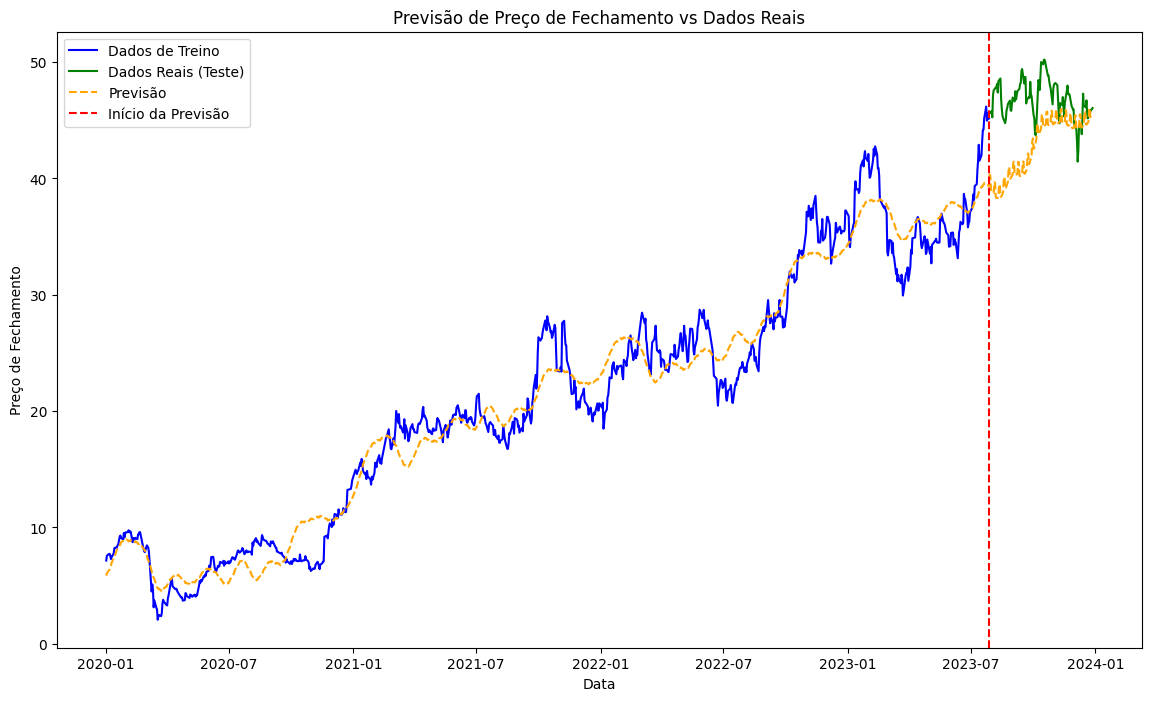

In [7]:
plt.figure(figsize=(14, 8))
plt.plot(dados_treino['data'], dados_treino['fechamento'], label='Dados de Treino', color='blue')
plt.plot(dados_teste['data'], dados_teste['fechamento'], label='Dados Reais (Teste)', color='green')
plt.plot(previsao['ds'], previsao['yhat'], label='Previsão', color='orange', linestyle='--')

plt.axvline(dados_treino['data'].max(), color='red', linestyle='--', label='Início da Previsão')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsão de Preço de Fechamento vs Dados Reais')
plt.legend()
plt.show()